In [3]:
!pip install h2o4gpu
from h2o4gpu.solvers import KMeans

     |████████████████████████████████| 346.3MB 30kB/s 
     |████████████████████████████████| 460kB 53.5MB/s 
     |████████████████████████████████| 6.7MB 13.8MB/s 
  Created wheel for psutil: filename=psutil-5.7.2-cp36-cp36m-linux_x86_64.whl size=279884 sha256=237d6fa4c45624ecb56ba2540cd7b6dc663bab07fcf021d8e7d80f2ce37a09bf
  Stored in directory: /root/.cache/pip/wheels/39/a0/f5/c4fa280463e29aea07797acb5312358fefb067c1f4f98e11b1
Successfully built psutil
  Found existing installation: psutil 5.4.8
    Uninstalling psutil-5.4.8:
      Successfully uninstalled psutil-5.4.8
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [5]:
url = 'https://raw.githubusercontent.com/maratonadev-br/desafio-2-2020/master/Assets/Data/dataset_desafio_2.csv'
df = pd.read_csv(url)
display(df.head(10))

MATRICULA                         NOME  ...  FALTAS       PERFIL
0     502375            Márcia Illiglener  ...       3       EXATAS
1     397093     Jason Jytereoman Izoimum  ...       3       EXATAS
2     915288    Bartolomeu Inácio da Gama  ...       3      HUMANAS
3     192652              Fernanda Guedes  ...       4  DIFICULDADE
4     949491       Alessandre Borba Gomes  ...       5  DIFICULDADE
5     627360    Magali Hellen Gejibaflião  ...       5      HUMANAS
6     804493            Tiago Brisu Pires  ...       6  DIFICULDADE
7     433789  Andressa Gabrielle da Silva  ...       6  DIFICULDADE
8     178335         Gilmar Oséas Etonvic  ...       4  DIFICULDADE
9     987229          Otávia Mônica Noopu  ...       3       EXATAS

[10 rows x 15 columns]

In [6]:
df.describe()

MATRICULA  REPROVACOES_DE  ...  TAREFAS_ONLINE        FALTAS
count   20000.000000    20000.000000  ...    20000.000000  20000.000000
mean   551148.271400        0.242850  ...        3.140300      4.060600
std    259488.766584        0.615055  ...        1.854909      1.674714
min    100003.000000        0.000000  ...        0.000000      1.000000
25%    326554.250000        0.000000  ...        2.000000      3.000000
50%    550630.000000        0.000000  ...        3.000000      4.000000
75%    775524.750000        0.000000  ...        5.000000      6.000000
max    999995.000000        3.000000  ...        7.000000      8.000000

[8 rows x 13 columns]

/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
/usr/local/lib/python3.6/dist-packages/seaborn/distributions.py:283: UserWarning: Data must have variance to c

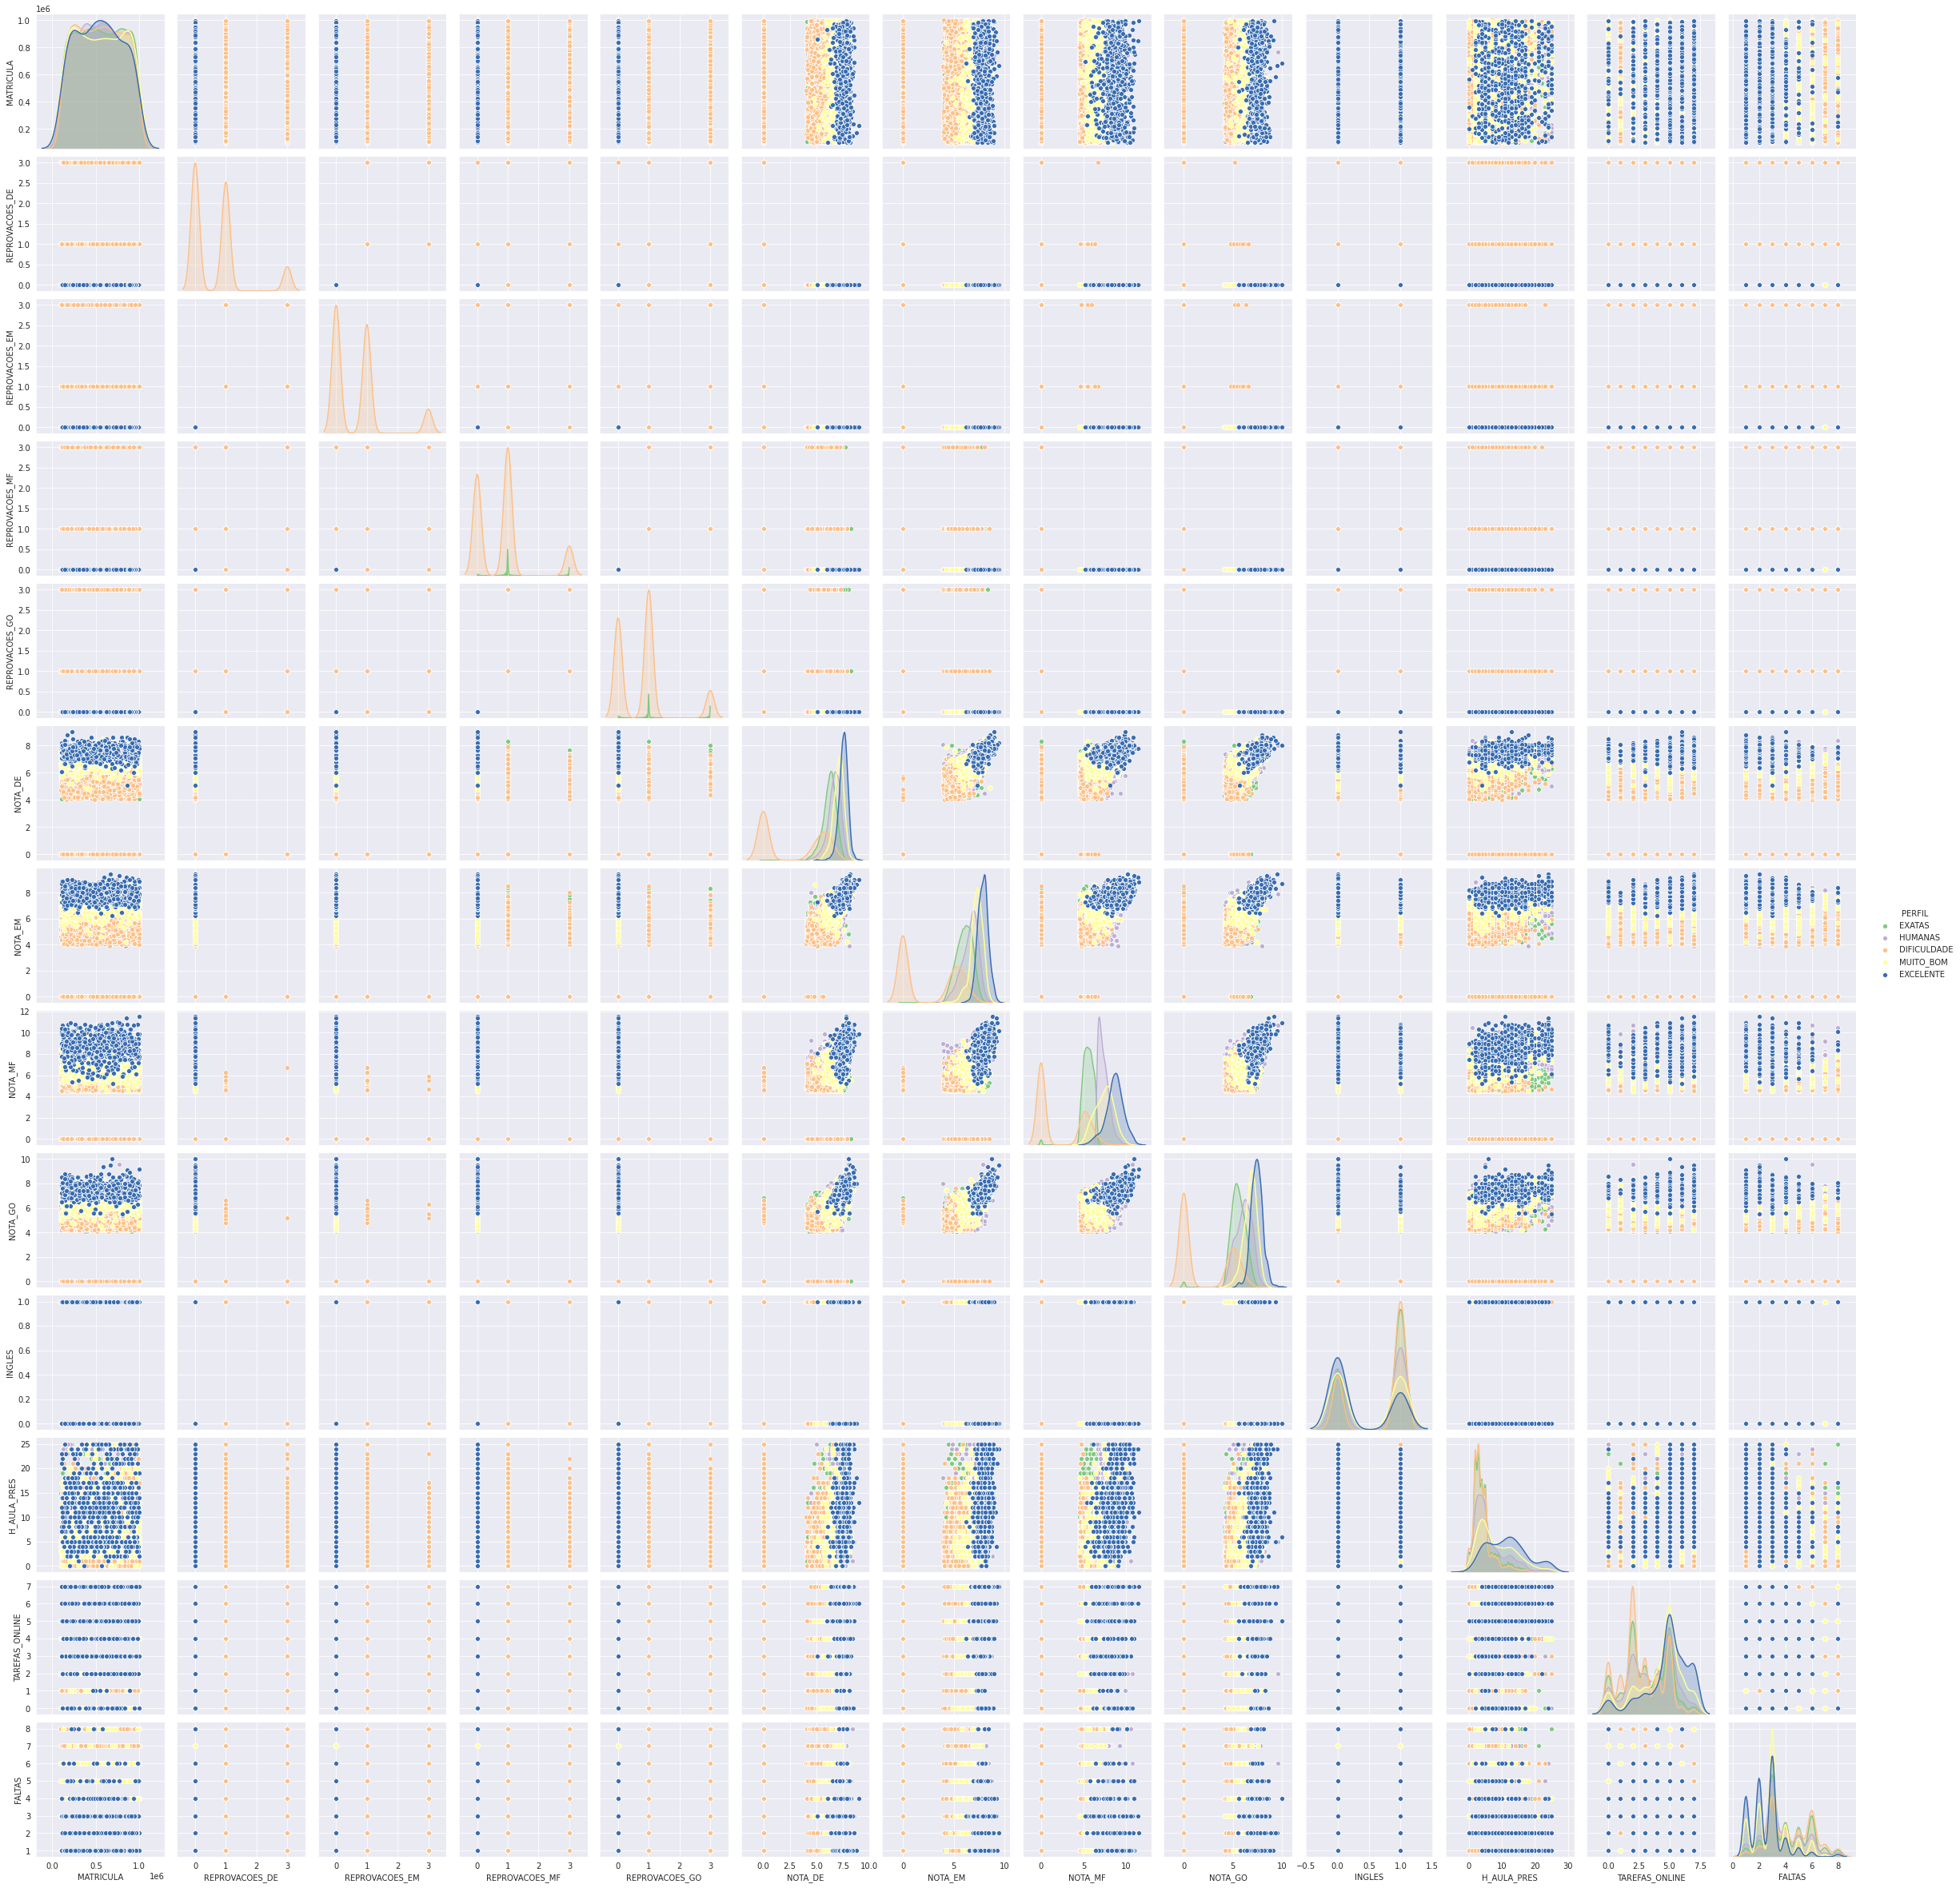

In [7]:
sns.set_palette("Accent")
# style -> white, dark, whitegrid, darkgrid, ticks
sns.set_style("darkgrid")
ax = sns.pairplot(df, hue="PERFIL")
# ax.fig.suptitle('Dispersão entre as Variáveis', fontsize=20, y=1.05)
ax

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import ExtraTreesClassifier, RandomForestClassifier
from sklearn.svm import LinearSVC #(setting multi_class=”crammer_singer”)
from sklearn.linear_model import LogisticRegressionCV #(setting multi_class=”multinomial”)
from sklearn.neural_network import MLPClassifier

In [9]:
from sklearn import metrics
from sklearn.model_selection import  train_test_split
import numpy as np

In [10]:
df_data = df.dropna()
print(f'Before:{df.shape}\nAfter:{df_data.shape}')

Before:(20000, 15)
After:(13334, 15)


In [11]:
X = df_data[['NOTA_DE',	'NOTA_EM'	,'NOTA_MF'	,'NOTA_GO',	'INGLES']]
y = df_data['PERFIL']
SEED = 5
np.random.seed(SEED)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25)

In [ ]:
parameters_extratrees = {
'n_estimators': [50, 100, 500, 1000],
'criterion': ['gini', 'entropy'],
#'max_depth': [None, 3, 5, 7, 10],
#'min_samples_split': [2, 5, 10, 0.1],
#'min_samples_leaf': [2, 5, 10, 0.1, 1, 0.5],
#'min_weight_fraction_leaf': [0.0,0.25,0.5,1,2,5], #next time, comment this
'max_features': ['sqrt', 'auto', 'log2'],
#'min_impurity_decrease': [0.1, 0.05, 0.01, 0.005, 0.0, 0.5],
#'warm_start': [True, False],
#'class_weigth': [None, 'balanced', 'balanced_subsample']    
}

etc = ExtraTreesClassifier()
clf_etc = GridSearchCV(etc, parameters_extratrees)
clf_etc.fit(X, y)

print(clf_etc.best_score_)
print(clf_etc.best_params_)
print(clf_etc.best_estimator_)
best_etc = clf_etc.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


In [13]:
rfc = RandomForestClassifier()
clf_rfc = GridSearchCV(rfc, parameters_extratrees,scoring='f1_samples')
clf_rfc.fit(X, y)

print(clf_rfc.best_score_)
print(clf_rfc.best_params_)
print(clf_rfc.best_estimator_)
best_rfc = clf_rfc.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)


ValueError: ignored

In [14]:
parameters_linear = {
    #'penalty': ['l1', 'l2'],
    #'loss': ['hinge', 'square_hinge'],
    'tol': [1e-4, 1e-3, 1e-2],
    'C': [0.1, 1, 5],
    'multi_class': ['crammer_singer'],
    'fit_intercept': [True, False],
    'max_iter': [10000]
}
lsvc = LinearSVC()
clf_lsvc = GridSearchCV(lsvc, parameters_linear,scoring='f1_samples')
clf_lsvc.fit(X, y)

print(clf_lsvc.best_score_)
print(clf_lsvc.best_params_)
print(clf_lsvc.best_estimator_)
best_lsvc = clf_lsvc.best_params_

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:1978: FutureWarning: The default value of cv will change from 3 to 5 in version 0.22. Specify it explicitly to silence this warning.
  warnings.warn(CV_WARNING, FutureWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


ValueError: ignored

In [ ]:
parameters_logistic = {
    'C': [0.1, 1, 5],
    'fit_intercept': [True,False],
    'dual': [True,False],
    'penalty': ['l1', 'l2', 'elasticnet'],
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'tol': [1e-4, 1e-3, 1e-2],
    'max_iter' = [1000],
    }

lrcv = LogisticRegressionCV()
clf_lrcv = GridSearchCV(lrcv, parameters_logistic,scoring='f1_samples')
clf_lrcv.fit(X,y)

print(clf_lrcv.best_score_)
print(clf_lrcv.best_params_)
print(clf_lrcv.best_estimator_)
best_lrcv = clf_lrcv.best_params_

In [ ]:
parameters_mlp = {
    'hidden_layer_sizes': [(50,50,50), (50,100,50), (100,), (5,2), (50,50,50,50)],
    'activation': ['identity', 'logistic', 'tanh', 'relu'],
    'solver': ['lbfgs', 'sgd', 'adam'],
    'learning_rate': ['constant', 'invscaling', 'adaptive'],
    #'max_iter': [1000, 5000],
    #'epsilon': [1e-8, 1e-5],
    #'alpha': [0.0001, 0.05]
}

mlpc = MLPClassifier()
clf_mlpc = GridSearchCV(mlpc, parameters_mlp,scoring='f1_samples')
clf_mlpc.fit(X,y)

print(clf_mlpc.best_score_)
print(clf_mlpc.best_params_)
print(clf_mlpc.best_estimator_)
best_mlpc = clf_mlpc.best_params_

In [ ]:
preds = [best_etc, best_rfc, best_lsvc, best_lrcv, best_mlpc]

for i in preds:
  print(i)
  i.fit(X_train, y_train)
  prediction = i.predict(X_test)
  print(classification_report(y_test, prediction))
  print(confusion_matrix(y_test, prediction))